 # 📘 Exploratory Data Analysis Notebook

 Clean, structured, NaN-safe, and ready for direct notebook execution.

In [64]:
# --- Imports and Notebook Setup ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 150)


In [ ]:
df = pd.read_csv("train.csv")
df.dropna(subset=["is_cheater"], inplace=True)

def feature_engineer(data):
    epsilon = 1e-6 # Small constant to prevent division by zero
    data['reports_per_day'] = data['reports_received'] / (data['account_age_days'] + epsilon)
    data['kdr_x_hs'] = data['kill_death_ratio'] * data['headshot_percentage']
    data['cheating_skill_metric'] = data['accuracy_score'] * data['headshot_percentage'] * data['spray_control_score']
    
    soft_skill_sum = data['game_sense_score'] + data['team_play_score']
    data['skill_discrepancy'] = (data['headshot_percentage'] + data['accuracy_score']) / (soft_skill_sum + epsilon)
    data['normalized_reaction_time'] = data['reaction_time_ms'] * data['first_blood_rate']
    data['stealth_score'] = data['utility_usage_rate'] / (data['movement_pattern_score'] + epsilon)
    data['technical_red_flags'] = data['device_changes_count'] / (data['input_consistency_score'] + epsilon)
    
    perf_growth_product = data['level_progression_speed'] * data['kill_consistency']
    data['performance_vs_longevity'] = perf_growth_product / (data['account_age_days'] + epsilon)
    data['social_isolation_index'] = data['reports_received'] / (data['friend_network_size'] + epsilon)
    
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    return data

df = feature_engineer(df)

# End of function

print("Shape:", df.shape)
df.head()


Shape: (97748, 43)


,id,player_id,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,reports_received,device_changes_count,input_consistency_score,avg_session_length_min,sessions_per_day,night_play_ratio,weapon_switch_speed,movement_pattern_score,aiming_smoothness,spray_control_score,game_sense_score,communication_rate,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement,is_cheater,reports_per_day,kdr_x_hs,cheating_skill_metric,skill_discrepancy,normalized_reaction_time,stealth_score,technical_red_flags,performance_vs_longevity,social_isolation_index
0,PLY00001,P058048,4.556072,15.494589,NaN,36.953785,0.737653,NaN,1204.586641,73.364603,0.033039,122.0,NaN,NaN,0.733983,130.540935,3.605662,0.616183,NaN,NaN,0.697074,0.636655,0.979355,0.620589,0.653589,0.860407,0.487273,0.534021,0.321734,NaN,91.517681,0.736361,0.928522,0.0,NaN,70.594462,364.538198,32.118868,NaN,NaN,NaN,0.000020,NaN
1,PLY00002,P037400,6.177695,51.476210,86.670187,59.946064,NaN,93.748524,3.405453,84.104334,12.211503,0.0,10.0,11.0,0.655691,32.243775,1.864701,0.097047,0.390793,0.524076,1.000000,0.747055,0.942148,0.851946,NaN,0.410925,0.690833,0.151872,0.462196,84.599562,119.212421,0.525739,0.946558,0.0,2.936466,318.004335,2305.260185,NaN,43.330221,1.003171,16.776175,NaN,1.000000e+07
2,PLY00003,P001054,6.584511,51.692578,32.827778,46.545739,0.811803,120.895839,551.221686,43.803175,0.076185,205.0,19.0,11.0,0.823197,257.077532,4.094368,NaN,0.474855,0.655892,0.655245,0.630495,0.775011,0.636306,0.639732,0.619968,0.511507,0.311445,0.270611,83.793333,58.200726,0.739374,0.897872,0.0,0.034469,340.370343,1517.014690,69.438934,32.715801,1.127278,13.362522,0.000112,9.268293e-02
3,PLY00004,P062710,5.237014,44.181842,62.740475,30.260066,0.345491,248.056545,114.034430,NaN,NaN,75.0,14.0,5.0,0.599739,106.481060,5.102765,0.336917,0.553323,NaN,0.801353,0.739435,0.852695,0.799637,0.766887,0.612241,0.477374,NaN,0.402723,97.518653,121.315491,0.531533,0.860302,1.0,0.122770,231.380909,988.583746,45.963630,99.898192,NaN,8.336941,NaN,1.866667e-01
4,PLY00005,P068548,2.453744,44.361101,68.296046,27.470153,0.851962,210.530688,153.210944,83.293728,0.354636,79.0,NaN,5.0,0.573104,246.220042,9.337887,0.107388,NaN,0.679243,NaN,0.844987,NaN,0.242936,0.691935,0.653540,0.698389,NaN,0.197220,50.405967,79.110571,0.771739,0.853758,1.0,NaN,108.850769,1029.705975,NaN,41.520885,1.136174,8.724398,0.001972,NaN


In [99]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
Index: 97748 entries, 0 to 99871
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        97748 non-null  object 
 1   player_id                 97748 non-null  object 
 2   kill_death_ratio          95444 non-null  float64
 3   headshot_percentage       82933 non-null  float64
 4   win_rate                  88072 non-null  float64
 5   accuracy_score            94794 non-null  float64
 6   kill_consistency          95221 non-null  float64
 7   reaction_time_ms          72236 non-null  float64
 8   account_age_days          79600 non-null  float64
 9   level                     74201 non-null  float64
 10  level_progression_speed   78898 non-null  float64
 11  friend_network_size       89767 non-null  float64
 12  reports_received          74132 non-null  float64
 13  device_changes_count      88829 non-null  float64
 14  input_consi

,id,player_id,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,reports_received,device_changes_count,input_consistency_score,avg_session_length_min,sessions_per_day,night_play_ratio,weapon_switch_speed,movement_pattern_score,aiming_smoothness,spray_control_score,game_sense_score,communication_rate,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement,is_cheater,reports_per_day,kdr_x_hs,cheating_skill_metric,skill_discrepancy,normalized_reaction_time,stealth_score,technical_red_flags,performance_vs_longevity,social_isolation_index
count,97748,97748,95444.000000,82933.000000,88072.000000,94794.000000,95221.000000,72236.000000,79600.000000,74201.000000,78898.000000,89767.000000,74132.000000,88829.000000,80522.000000,92466.000000,81938.000000,90000.000000,85091.000000,74398.000000,97269.000000,95776.000000,75408.000000,81979.000000,82593.000000,90809.000000,91160.000000,73406.000000,95243.000000,81272.000000,86807.000000,95306.000000,91307.000000,97748.000000,60351.000000,80981.000000,78815.000000,52453.000000,70417.000000,72553.000000,73165.000000,62650.000000,6.811000e+04
unique,97748,97748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,PLY00001,P058048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.730750,47.871529,71.400347,40.138829,0.648542,135.045421,496.834485,62.802423,0.356886,138.041641,12.933497,7.515901,0.740368,149.754921,4.950519,0.378136,0.634346,0.713911,0.833598,0.792963,0.818398,0.549690,0.644997,0.596000,0.690574,0.339610,0.323246,66.207617,95.623083,0.579639,0.883117,0.349153,0.154194,230.550708,1554.981415,61.148450,43.081135,0.843714,10.367111,0.032647,5.558690e+04
std,NaN,NaN,1.518358,13.814230,13.980322,12.130100,0.150923,51.149424,351.059698,20.719977,1.530762,84.951210,5.480267,4.603716,0.103294,72.257131,2.623461,0.196264,0.154676,0.131690,0.113502,0.119484,0.100653,0.190050,0.152954,0.156433,0.132490,0.138656,0.120201,24.287396,29.522108,0.173551,0.041549,0.476705,0.712103,115.840685,782.179695,15.848975,22.011895,0.310605,6.605943,0.597847,1.069571e+06
min,NaN,NaN,0.500000,5.000000,19.072048,8.000000,0.250000,55.000000,1.025164,25.000258,0.003612,0.000000,4.000000,0.000000,0.382475,25.002053,0.400157,0.040008,0.267220,0.313407,0.344195,0.350000,0.355680,0.220018,0.380002,0.235636,0.460000,0.100012,0.096278,8.414078,11.238571,0.280005,0.800002,0.000000,0.003344,13.930210,77.767776,12.863137,6.611856,0.299583,0.000000,0.000001,1.486989e-02
25%,NaN,NaN,3.706811,38.237956,61.709785,31.591746,0.543284,99.359833,158.415186,44.879460,0.040469,64.000000,9.000000,4.000000,0.674477,87.046309,2.677605,0.207707,0.501891,0.606705,0.758630,0.712330,0.748588,0.385570,0.512565,0.465076,0.576312,0.219200,0.219911,45.196042,70.571078,0.429498,0.848069,0.000000,0.014714,152.507134,987.088070,49.957437,25.967914,0.600019,4.775648,0.000035,5.454545e-02
50%,NaN,NaN,4.563657,47.135233,71.317812,39.580964,0.651926,128.449020,479.844870,62.852673,0.080888,136.000000,12.000000,8.000000,0.741019,149.688498,4.956912,0.377928,0.632198,0.713337,0.843628,0.799721,0.820728,0.548765,0.644557,0.588789,0.690381,0.339672,0.322394,66.192495,95.213324,0.579029,0.883175,0.000000,0.024960,207.473975,1416.055164,59.625651,39.271087,0.814202,10.154666,0.000100,8.695652e-02
75%,NaN,NaN,5.535702,56.614650,81.006708,48.071153,0.756572,162.588527,763.516841,80.774006,0.210016,206.000000,16.000000,12.000000,0.81877

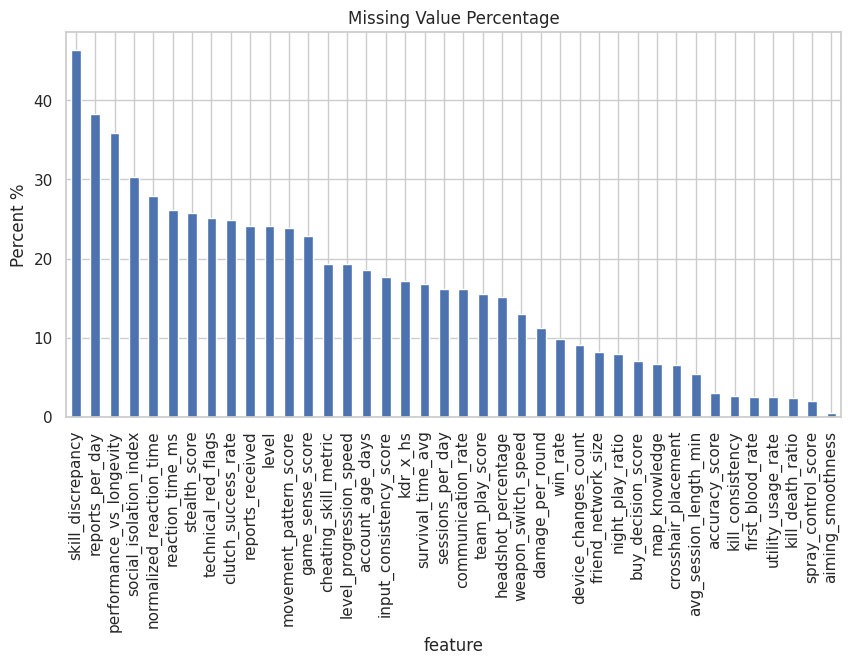

In [86]:
missing = df.isna().sum().sort_values(ascending=False)
missing_df = pd.DataFrame({
    "feature": missing.index,
    "missing": missing.values,
    "missing_percent": (missing.values / len(df)) * 100
})

plt.figure(figsize=(10, 5))
missing_df[missing_df["missing"] > 0].set_index("feature")["missing_percent"].plot(kind="bar")
plt.title("Missing Value Percentage")
plt.ylabel("Percent %")
plt.show()


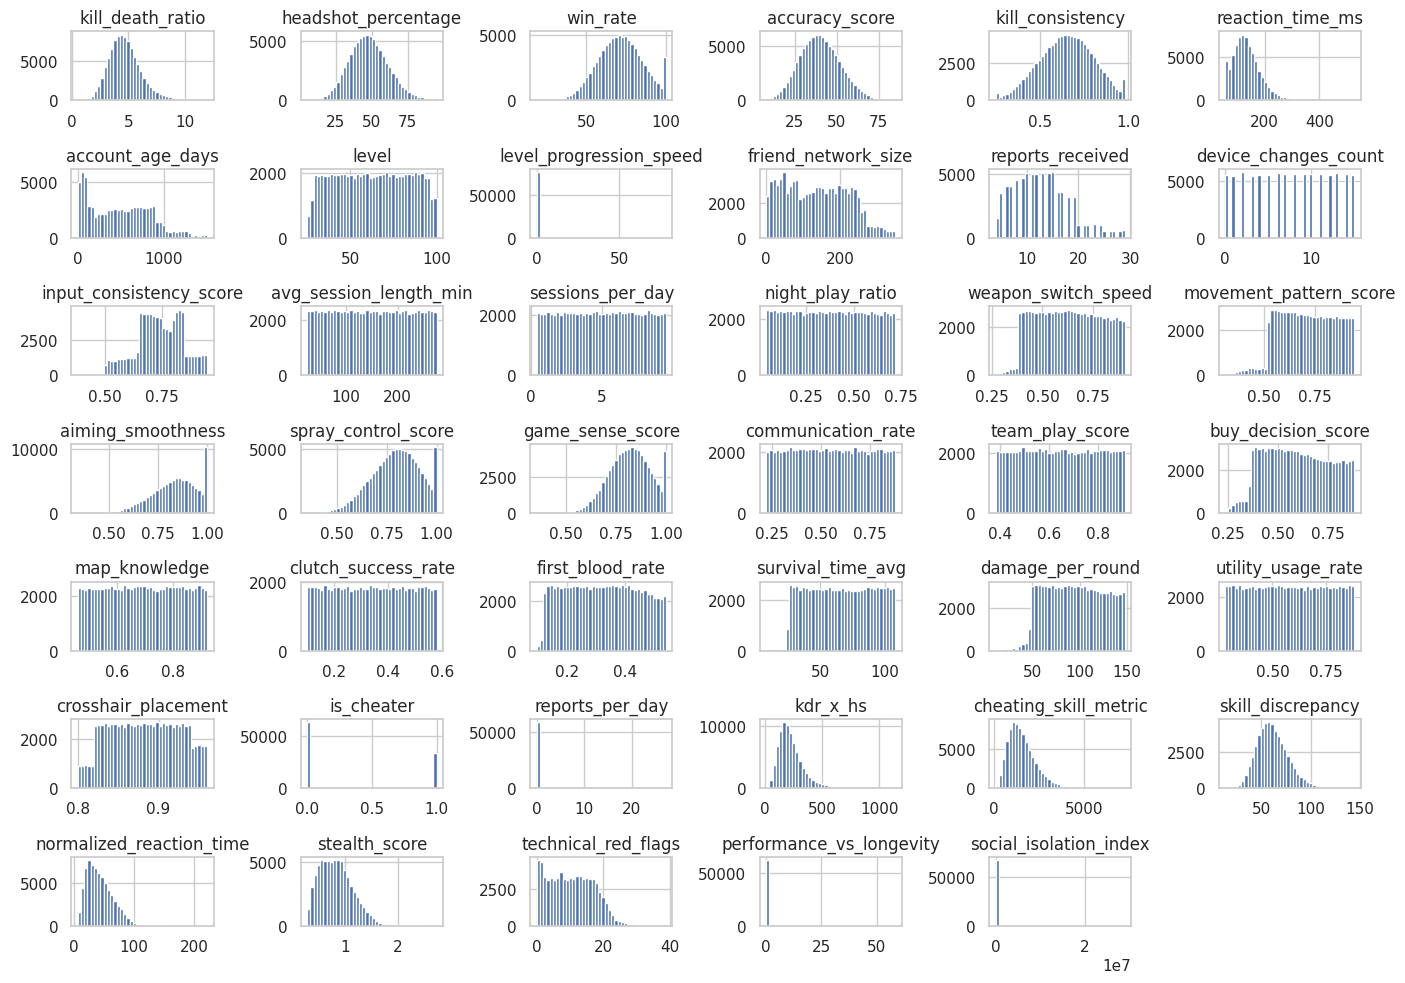

In [87]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(bins=40, figsize=(14, 10))
plt.tight_layout()
plt.show()


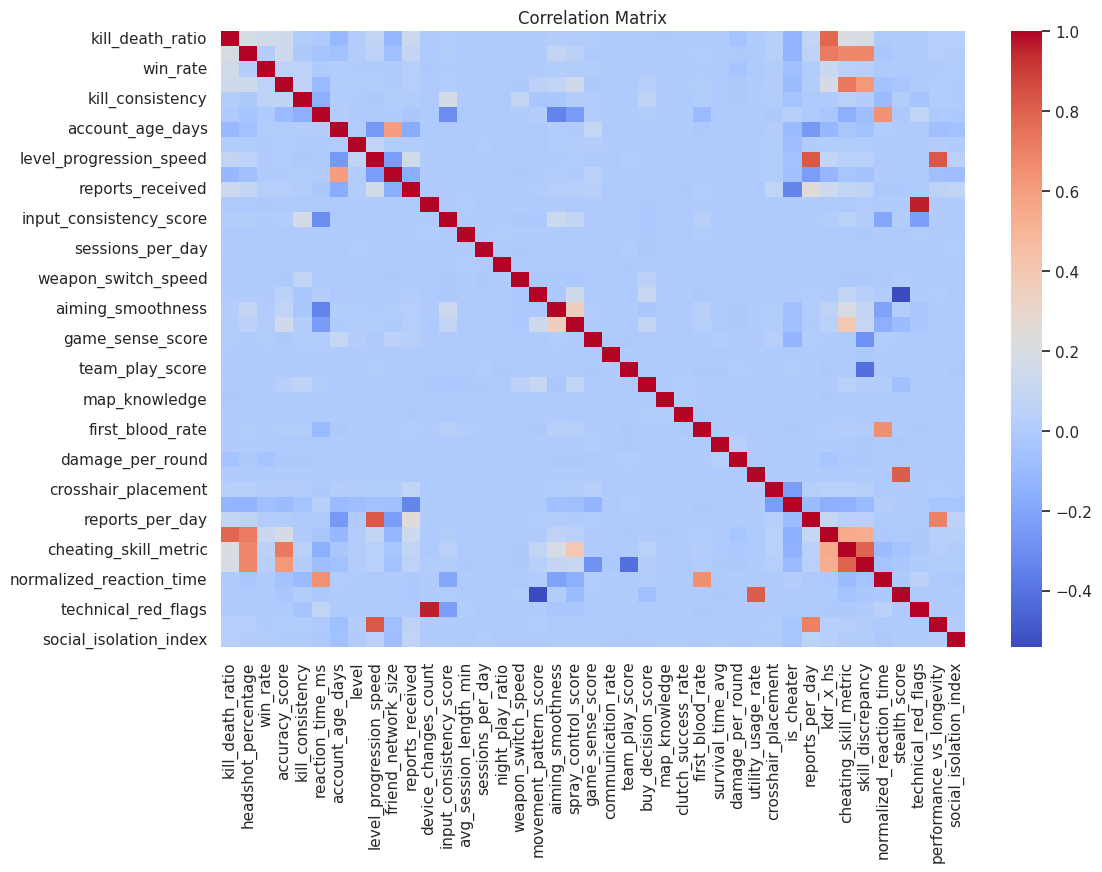

In [88]:
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [89]:
# --- ANOVA Feature Importance (NaN-safe) ---

from sklearn.feature_selection import f_classif

# Only numeric features allowed for ANOVA
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [f for f in numeric_features if f not in ['is_cheater','id','player_id']]

X_anova = df[numeric_features].copy()
X_anova = X_anova.fillna(X_anova.mean(numeric_only=True))
y = df['is_cheater']

F, p = f_classif(X_anova, y)

anova_df = pd.DataFrame({
    "feature": numeric_features,
    "F_value": F,
    "p_value": p
}).sort_values(by="F_value", ascending=False)

print("\n=== ANOVA Feature Scores ===")
display(anova_df)



=== ANOVA Feature Scores ===


,feature,F_value,p_value
10,reports_received,9064.071118,0.000000e+00
30,crosshair_placement,5331.612341,0.000000e+00
32,kdr_x_hs,2105.129439,0.000000e+00
33,cheating_skill_metric,1800.800546,0.000000e+00
0,kill_death_ratio,1629.786341,0.000000e+00
1,headshot_percentage,1536.624890,0.000000e+00
20,game_sense_score,1194.592631,3.431173e-260
3,accuracy_score,846.357016,2.796003e-185
6,account_age_days,791.527527,1.853849e-173
31,reports_per_day,532.904852,1.362916e-117


In [90]:
df.dtypes

id                           object
player_id                    object
kill_death_ratio            float64
headshot_percentage         float64
win_rate                    float64
accuracy_score              float64
kill_consistency            float64
reaction_time_ms            float64
account_age_days            float64
level                       float64
level_progression_speed     float64
friend_network_size         float64
reports_received            float64
device_changes_count        float64
input_consistency_score     float64
avg_session_length_min      float64
sessions_per_day            float64
night_play_ratio            float64
weapon_switch_speed         float64
movement_pattern_score      float64
aiming_smoothness           float64
spray_control_score         float64
game_sense_score            float64
communication_rate          float64
team_play_score             float64
buy_decision_score          float64
map_knowledge               float64
clutch_success_rate         

,feature,importance
30,crosshair_placement,0.206292
10,reports_received,0.194120
6,account_age_days,0.099130
9,friend_network_size,0.079324
7,level,0.057711
32,kdr_x_hs,0.040325
33,cheating_skill_metric,0.025672
31,reports_per_day,0.024012
20,game_sense_score,0.019992
0,kill_death_ratio,0.015611


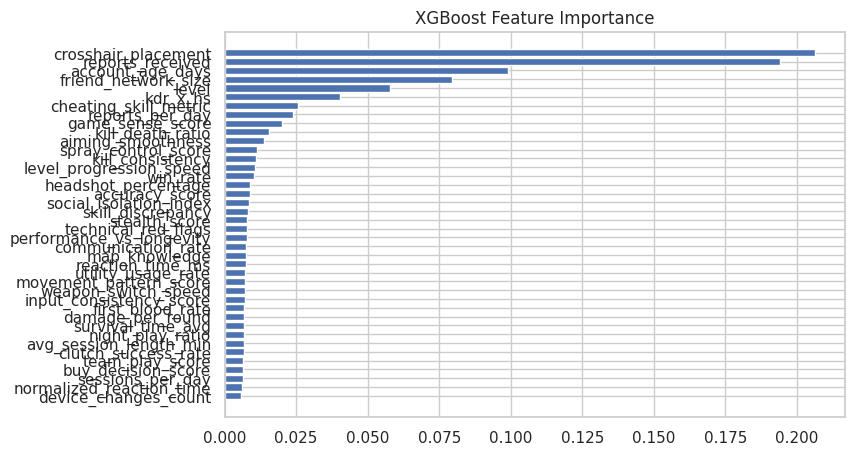

In [94]:
# --- XGBoost Feature Importance ---

from xgboost import XGBClassifier, XGBRegressor

model = XGBClassifier()

# XGBoost can handle NaN automatically
features = [col for col in df.columns if col not in ['is_cheater','id','player_id']]
X = df[features]
y = df['is_cheater']

model.fit(X, y)

importance_df = pd.DataFrame({
    "feature": features,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

display(importance_df)

plt.figure(figsize=(8, 5))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importance")
plt.show()


In [97]:
importance_df[importance_df['importance'] > 0.02]

,feature,importance
30,crosshair_placement,0.206292
10,reports_received,0.194120
6,account_age_days,0.099130
9,friend_network_size,0.079324
7,level,0.057711
32,kdr_x_hs,0.040325
33,cheating_skill_metric,0.025672
31,reports_per_day,0.024012
